Praktikum 6 datamining
K means clustering

lakukan clustering pada dataset iris. Langkah langkah
1. normalisasikan dataset iris menggunakan normalisasi minmax
2. tampilkan scatter plot sebelum clustering
3. clusterlah dataset iris dengan nilai K 2, 3, 4
4. tampilkan scatter plot setelah clustering
5. analisalah perbandingan scatter plot sebelum clustering dan setelah clustering
6. tentukan manakah k terbaik jika dilakukan analisa secara visual
tugas no 1 – 6 dilakukan terhadap kombinasi attribut
• sepal length ~sepal width
• sepal length ~petal width
• sepal width ~petal width
• petal length ~petal width

In [9]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

import semua library yang dibutuhkan

In [10]:
datairis = load_iris()
df = pd.DataFrame(datairis.data, columns=datairis.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


load dataset iris dan kita panggil juga dataframenya. 

In [11]:
def normalisasi(df):
  for i in df:
    scaler = MinMaxScaler()
    scaler.fit(df[[i]])
    df[i] = scaler.transform(df[[i]])
normalisasi(df)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667
...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667
146,0.555556,0.208333,0.677966,0.750000
147,0.611111,0.416667,0.711864,0.791667
148,0.527778,0.583333,0.745763,0.916667


untuk melalkukan normalisasi, kita buat fungsi dari normalisasinya. Kita lakukan perulangan untuk memanggil data pada dataframe diatas. Lalu kita juga lakukan scalling dengan menghitung minmax scallernya untuk normalisasinya. Kita hitung scallingnya menggunakan .fit dari dataframe dengan index ke i. Kita deklarasikan dataframe index i dengan .transform. Lalu kita panggil fungsi normalisasi dengan paramater df. Setelah kita normalisasikan nilainya ada diantara 0 dan 1

In [12]:
def plot_scatter(x,y):
  plt.scatter(df[x],df[y])
  plt.xlabel(x)
  plt.ylabel(y)

Kita buat fungsi scatternya untuk menampilkan plot scatternya sebelum di clustering. Kita juga membutuhkan kolom x dan y pada dataframe scatternya. 

In [13]:
def clustering(n,x,y):
  km = KMeans(n_clusters=n)
  y_predicted = km.fit_predict(df[[x,y]])
  print('Prediksi clustering : \n',y_predicted),"\n"
  df['cluster']=y_predicted
  print('centroid :\n',km.cluster_centers_,"\n")
  return km.cluster_centers_

Kita buat fungsi untuk clusteringnya. Kita buat parameternya n,x,dan y. N itu jumlah clusterignya. Lalu kita prediksi juga clusteringnya. Kita print prediksi clusteringnya dengan parameter y_predicted. Kita juga hitung centroidnya dengan parameter km.cluster_centers_. Lalu kita return hasil dari km.cluster_centers_.

In [14]:
def scatter_cluster(n,x,y):
  centroid = clustering(n,x,y)
  df0 = df[df.cluster==0]
  df1 = df[df.cluster==1]
  df2 = df[df.cluster==2]
  df3 = df[df.cluster==3]
  plt.scatter(df0[x],df0[y],color = 'yellow',label = "cluster index 0")
  plt.scatter(df1[x],df1[y],color = 'lime',label = "cluster index 1")
  plt.scatter(df2[x],df2[y],color = 'magenta',label = "cluster index 2")
  plt.scatter(df3[x],df3[y],color = 'cyan',label = "cluster index 3")
  plt.scatter(centroid[:,0], centroid[:,1], color ='black',marker='*',label='centroid')
  plt.xlabel(x)
  plt.ylabel(y)
  plt.legend()

kita buat fungsi scatter clusternya variabelnya sama (n,x,y) untuk memanggil fungsi clustering yang diatas tadi. Kita definisikan juga data clusternya sesuai nilainya. Lalu kita buat scatternya dengan warna yang berbeda dan label yang berbeda pula. 

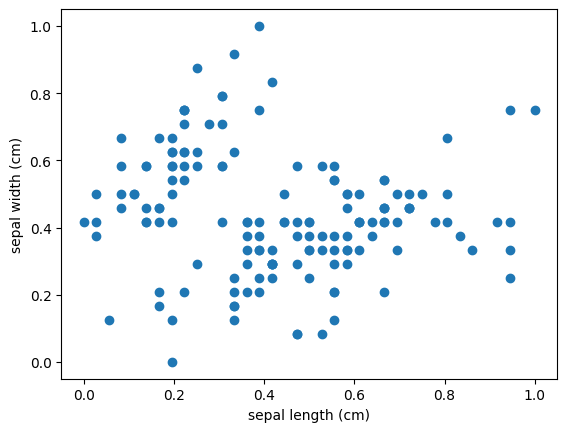

In [17]:
#Sepal lenght & Sepal width
plot_scatter("sepal length (cm)","sepal width (cm)")

menampilkan atribut sepal lenght & sepal width

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Prediksi clustering : 
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
centroid :
 [[0.57035024 0.37047101]
 [0.20402299 0.55172414]] 



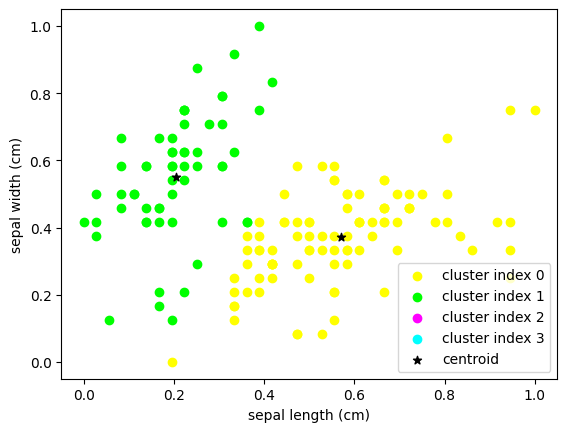

In [18]:
scatter_cluster(2,"sepal length (cm)","sepal width (cm)")

Kita hitung scatter clusternya. Kita hitung dengan K nya itu 2. 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Prediksi clustering : 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 2 0 0 0 0 0 0 0 0 1 1 1 2 1 2 1 2 1 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2
 1 1 1 1 2 2 2 2 2 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 1 2 1 1 1 1
 2 1 2 2 1 1 1 1 2 1 2 1 2 1 1 2 2 1 1 1 1 1 2 2 1 1 1 2 1 1 1 2 1 1 1 2 1
 1 2]
centroid :
 [[0.19897959 0.60459184]
 [0.69562648 0.45390071]
 [0.40483539 0.28009259]] 



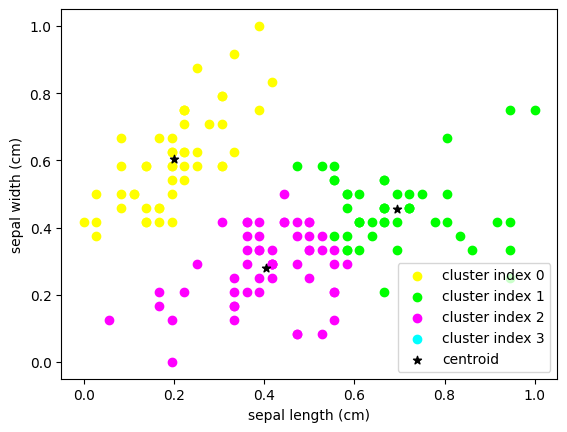

In [19]:
scatter_cluster(3,"sepal length (cm)","sepal width (cm)")

Kita hitung scatter clusternya. Kita hitung dengan K nya itu 3. 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Prediksi clustering : 
 [0 3 3 3 0 0 0 0 3 3 0 0 3 3 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 3 3 0 0 0 3 3 0
 0 3 0 0 3 3 0 0 3 0 3 0 0 2 2 2 1 1 1 2 3 2 3 3 1 1 1 1 2 1 1 1 1 1 1 1 1
 1 2 2 2 1 1 1 1 1 1 3 0 2 1 1 1 1 1 1 3 1 1 1 1 3 1 2 1 2 1 2 2 3 2 1 2 2
 1 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 1 2 2 2 1 1 1 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]
centroid :
 [[0.24836601 0.67647059]
 [0.45940171 0.29887821]
 [0.71597222 0.46979167]
 [0.13888889 0.36458333]] 



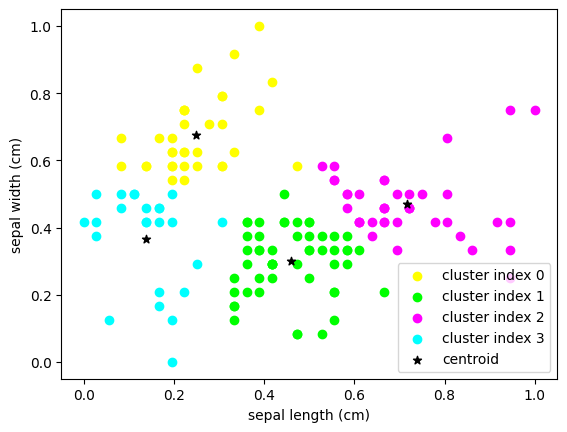

In [20]:
scatter_cluster(4,"sepal length (cm)","sepal width (cm)")

Kita hitung scatter clusternya. Kita hitung dengan K nya itu 4. 

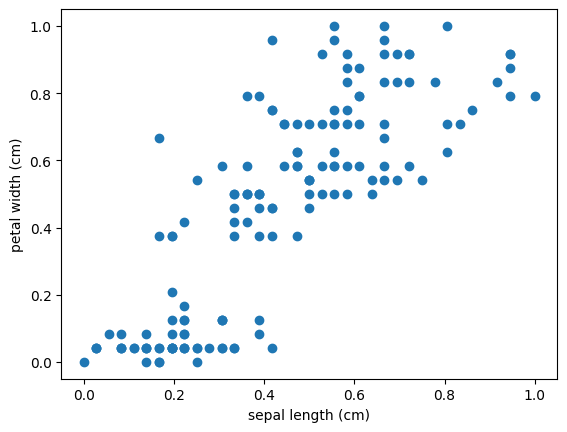

In [21]:
#Sepal Length & Petal width
plot_scatter("sepal length (cm)","petal width (cm)")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Prediksi clustering : 
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
centroid :
 [[0.56630824 0.67697133]
 [0.20419103 0.10087719]] 



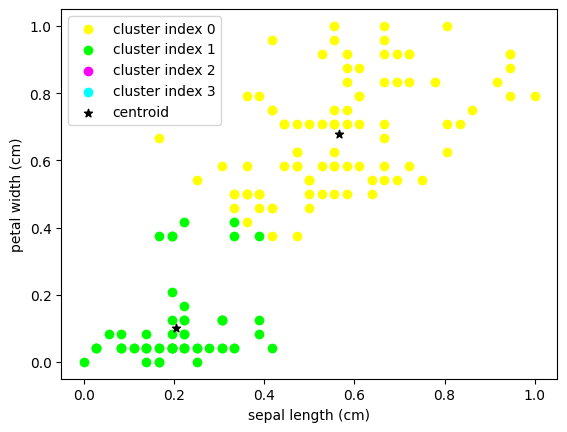

In [23]:
scatter_cluster(2,"sepal length (cm)","petal width (cm)")

Untuk scatter cluster K 2

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Prediksi clustering : 
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 2 2 2 2 1 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 0 2 0 2 0 0 2 0 0 0 0
 0 0 2 0 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 2 0 0 0 2 0 0 0 2 0 0 0 0 0
 0 2]
centroid :
 [[0.70726496 0.8258547 ]
 [0.19549266 0.07861635]
 [0.45450192 0.55747126]] 



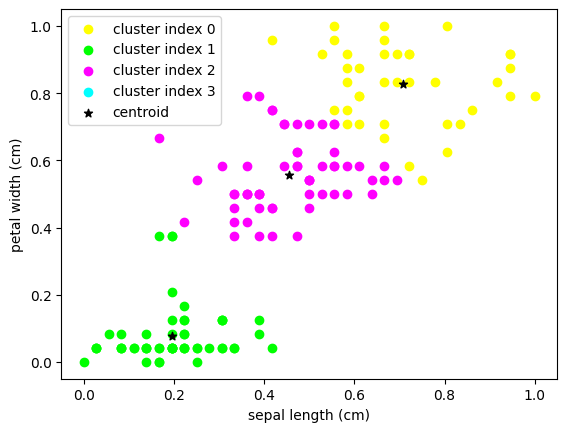

In [24]:
scatter_cluster(3,"sepal length (cm)","petal width (cm)")

Untuk scatter cluster K 3

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Prediksi clustering : 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 3 1 3 1 3 1 3 3 1 3 1 3 1 3 3 1 3 1 1 1 3
 1 1 1 1 1 3 3 3 3 1 3 1 1 1 3 3 3 1 3 3 3 3 3 1 3 3 2 1 2 1 2 2 3 2 1 2 2
 1 2 1 2 2 1 2 2 1 2 1 2 1 2 2 1 1 2 1 2 2 2 1 1 2 2 1 1 2 2 2 1 2 2 2 1 2
 2 1]
centroid :
 [[0.19611111 0.06083333]
 [0.55167959 0.62693798]
 [0.7212963  0.87222222]
 [0.33847737 0.46450617]] 



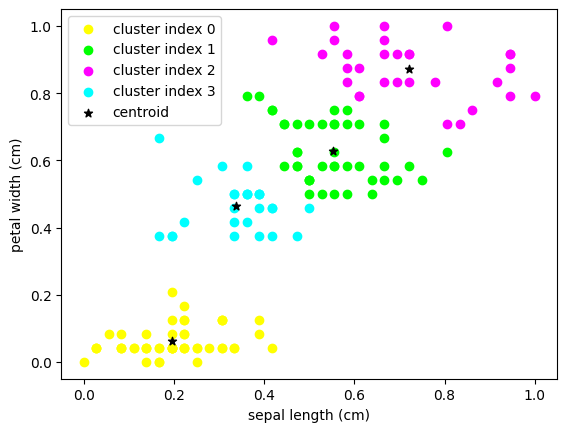

In [25]:
scatter_cluster(4,"sepal length (cm)","petal width (cm)")

Untuk scatter cluster K 4

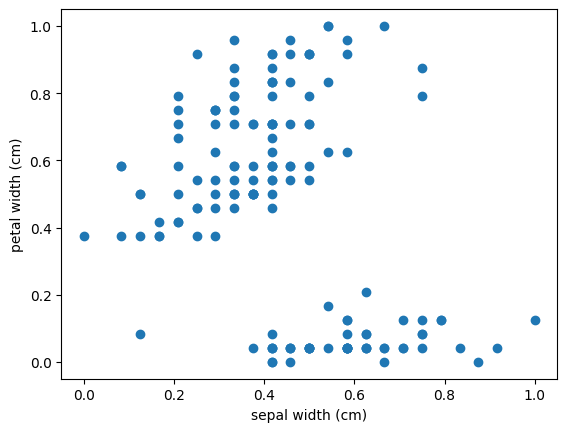

In [26]:
#Sepal width & Petal Width
plot_scatter("sepal width (cm)","petal width (cm)")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Prediksi clustering : 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]
centroid :
 [[0.595      0.06083333]
 [0.36333333 0.65666667]] 



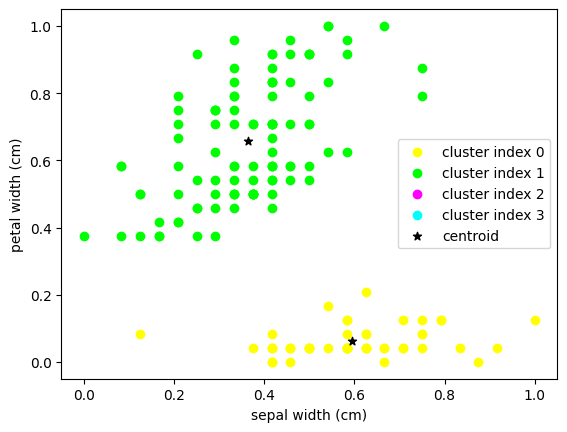

In [27]:
scatter_cluster(2,"sepal width (cm)","petal width (cm)")

Untuk scatter cluster K 2

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Prediksi clustering : 
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 0 2 0 2 2
 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 0 2 2 2 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
centroid :
 [[0.29481132 0.50393082]
 [0.60459184 0.06037415]
 [0.43402778 0.81336806]] 



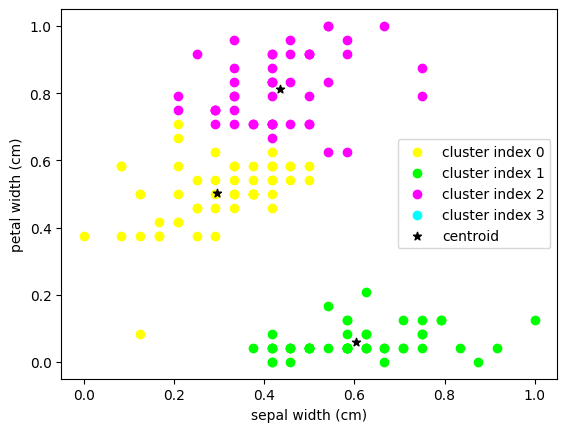

In [28]:
scatter_cluster(3,"sepal width (cm)","petal width (cm)")

Untuk scatter cluster K 3

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Prediksi clustering : 
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 2 2 2 0 2 0 2 0 2 0 0 2 0 2 2 2 2 0 0 0 2 0 0 0
 2 2 2 2 2 0 0 0 0 2 2 2 2 0 2 0 0 2 0 0 0 2 2 2 0 0 3 2 3 2 3 3 2 2 2 3 3
 2 3 2 3 3 2 3 3 0 3 2 2 2 3 2 2 2 3 2 2 3 3 2 0 3 3 2 2 3 3 3 2 3 3 3 2 3
 3 2]
centroid :
 [[0.20679012 0.44907407]
 [0.60459184 0.06037415]
 [0.3828125  0.63368056]
 [0.48076923 0.89262821]] 



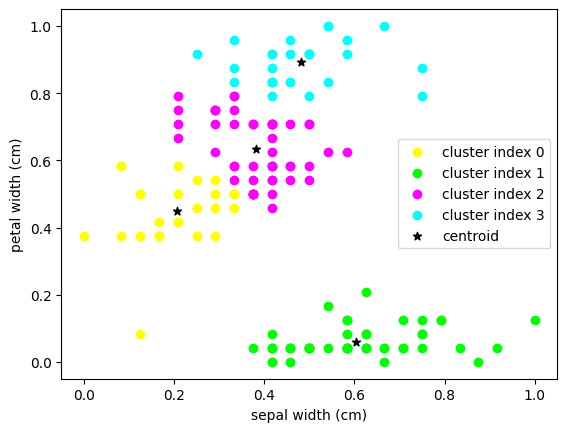

In [29]:
scatter_cluster(4,"sepal width (cm)","petal width (cm)")

Untuk scatter cluster K 4

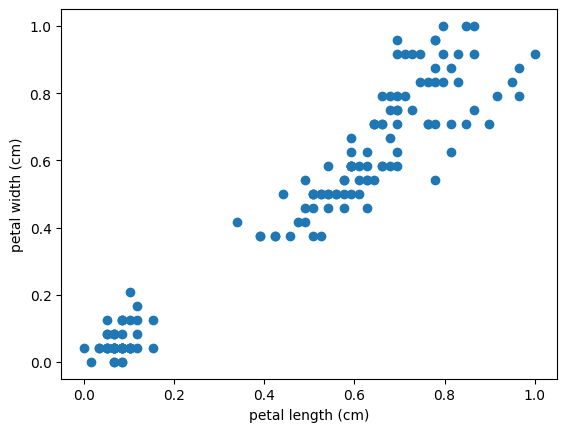

In [30]:
#Petal Length & Petal Width
plot_scatter("petal length (cm)","petal width (cm)")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Prediksi clustering : 
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
centroid :
 [[0.6620339  0.65666667]
 [0.07830508 0.06083333]] 



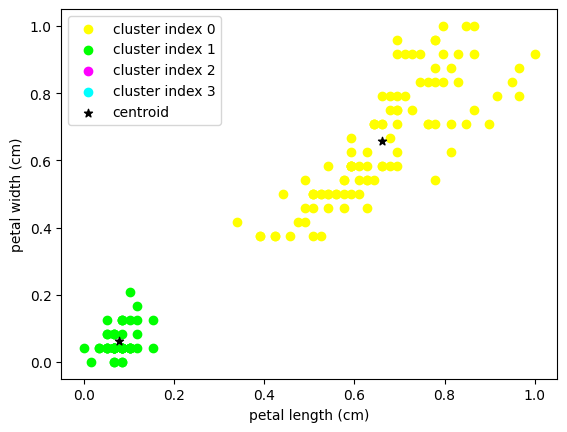

In [31]:
scatter_cluster(2,"petal length (cm)","petal width (cm)")

scatter cluster untuk K 2

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Prediksi clustering : 
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 0 2 2 2 2
 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
centroid :
 [[0.55867014 0.51041667]
 [0.07830508 0.06083333]
 [0.7740113  0.81510417]] 



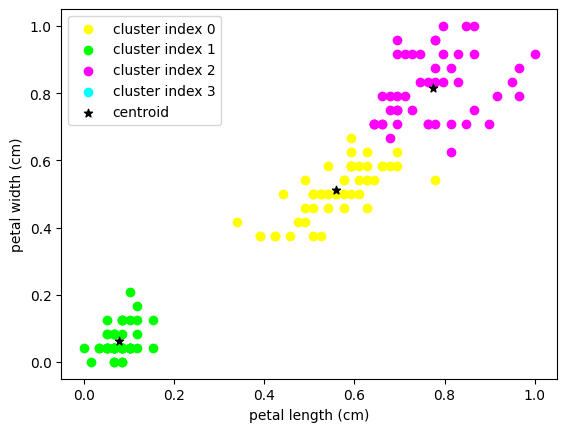

In [32]:
scatter_cluster(3,"petal length (cm)","petal width (cm)")

scatter cluster untuk K 3

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Prediksi clustering : 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 1 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 2
 2 2 2 1 2 2 2 2 2 1 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 3 1 3 1 3 3 1 3 1 3 1
 1 3 1 3 3 1 3 3 1 3 1 3 1 3 1 1 1 3 1 3 3 3 1 1 3 3 1 1 3 3 3 1 3 3 3 1 1
 3 1]
centroid :
 [[0.07830508 0.06083333]
 [0.695462   0.68548387]
 [0.53430186 0.4890873 ]
 [0.82234777 0.88425926]] 



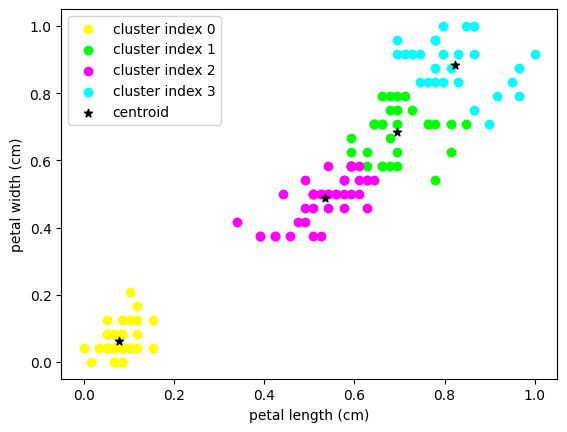

In [33]:
scatter_cluster(4,"petal length (cm)","petal width (cm)")

scatter cluster untuk K 4

Menurut saya, pada atribut sepal length dan sepal width K terbaik terdapat pada K3 karena jarak cetroidnya sudah sesuai dan terbaik.  